## Ridge Regression
Linear regression (aka Least squares regression) doesn't perform well at all when the number of predictors(features) exceeds the number of observations; It is not able to differentiate “important” from “less-important” predictors in a model, so it includes all of them. This leads to `overfitting` a model and failure to find unique solutions. Least squares also has issues dealing with `multicollinearity` in data. 

Ridge regression which is a slighter varition of linear regression, avoids all of these problems. It works in part because it doesn’t require `unbiased estimators`; While least squares produces unbiased estimates, variances can be so large that they may be wholly inaccurate. Ridge regression adds just enough bias to make the estimates reasonably reliable approximations to true population values.

> In short: Ridge regression is slighter varition of simple linear regression. It is a `Regularization` algorithm based on `L2 Regularization`. It is used for dealing with overfitting and high variance of a model. Ridge regression is good at handling model's high `complexity` and `multi-collinearity`.

#### Why Linear regression doesn't perform well, when it has more predictors than total number of observation. 
* `Linear regression require the total number of observation to be atleast equal to the total number of predictors`. The number of predictors is equal to the number of dimension so if we have less number of observation than predictors than linear regression dosen't able to conclude the best fit hyper plane on that dimension see the example below
> 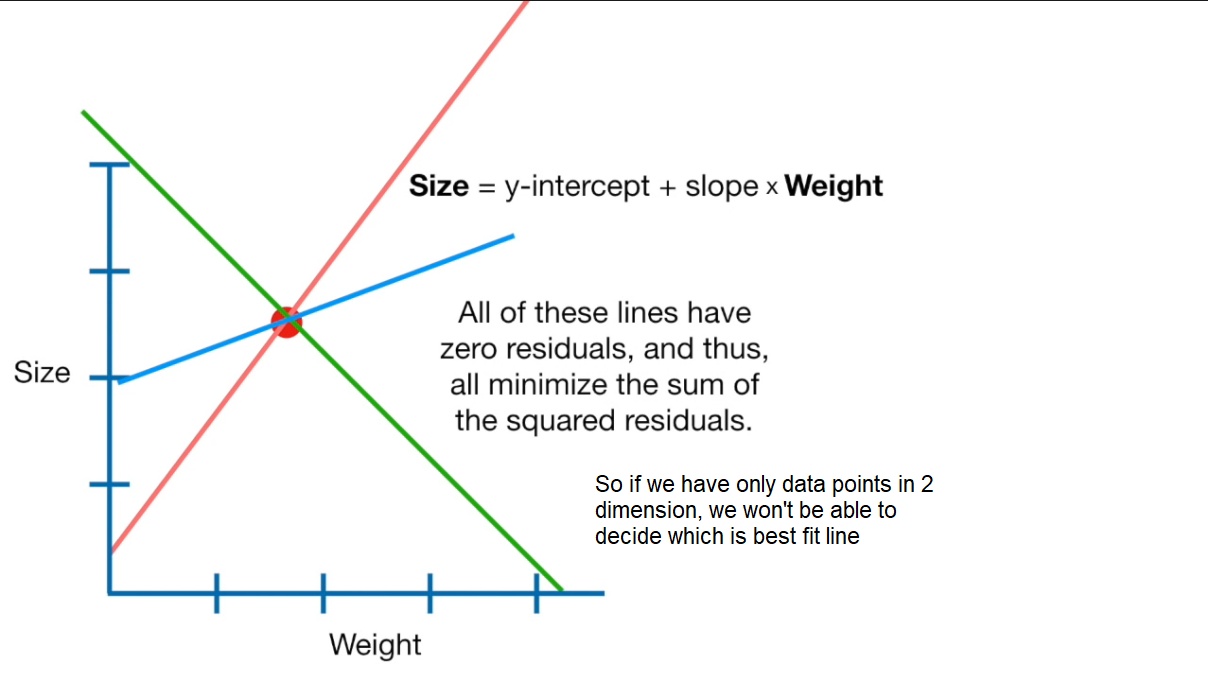
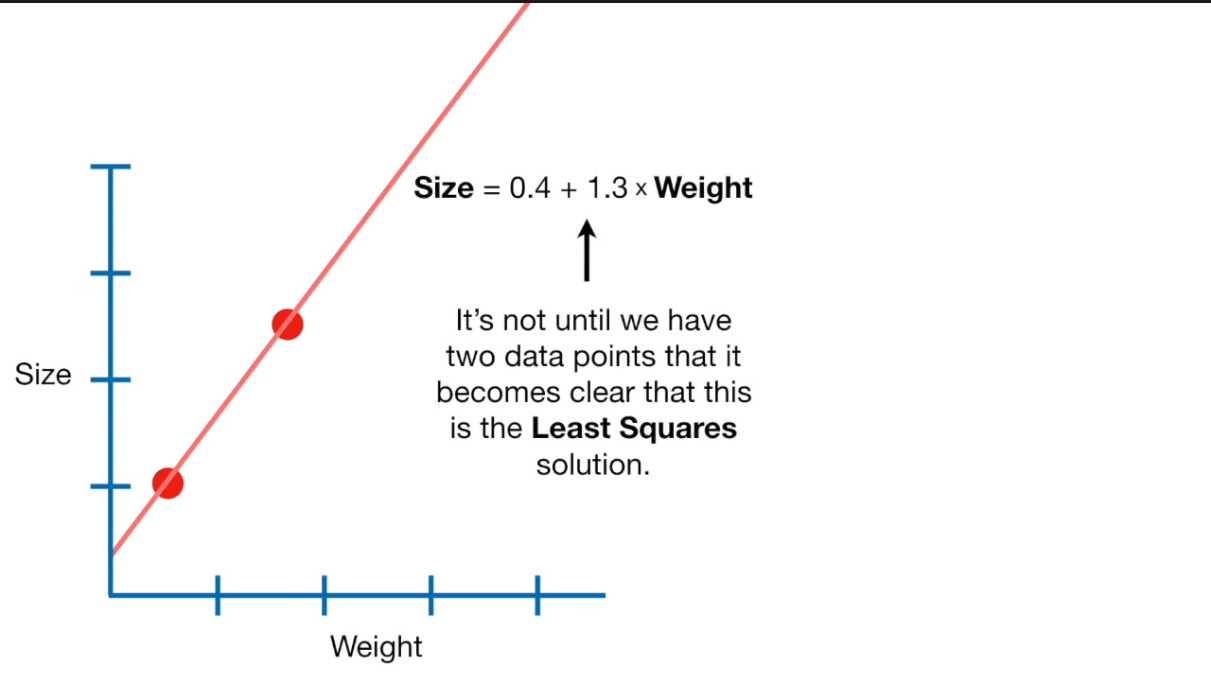
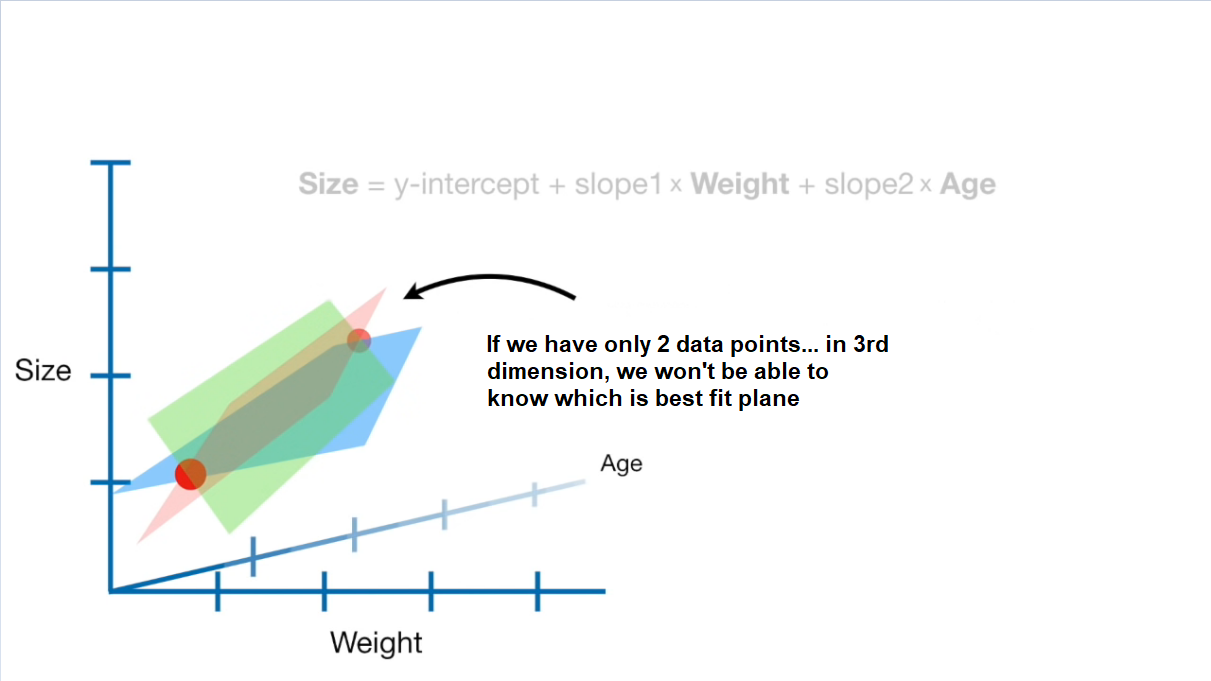
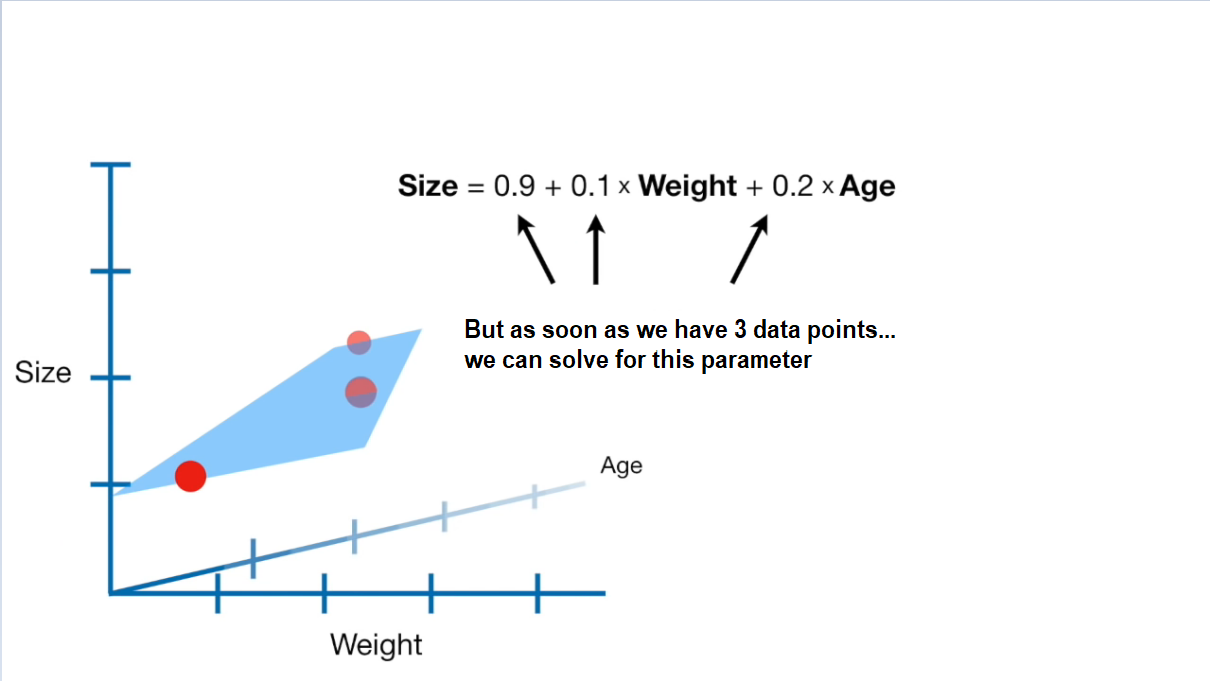 <br>
* How Ridge Regression solves this issue <br>
> 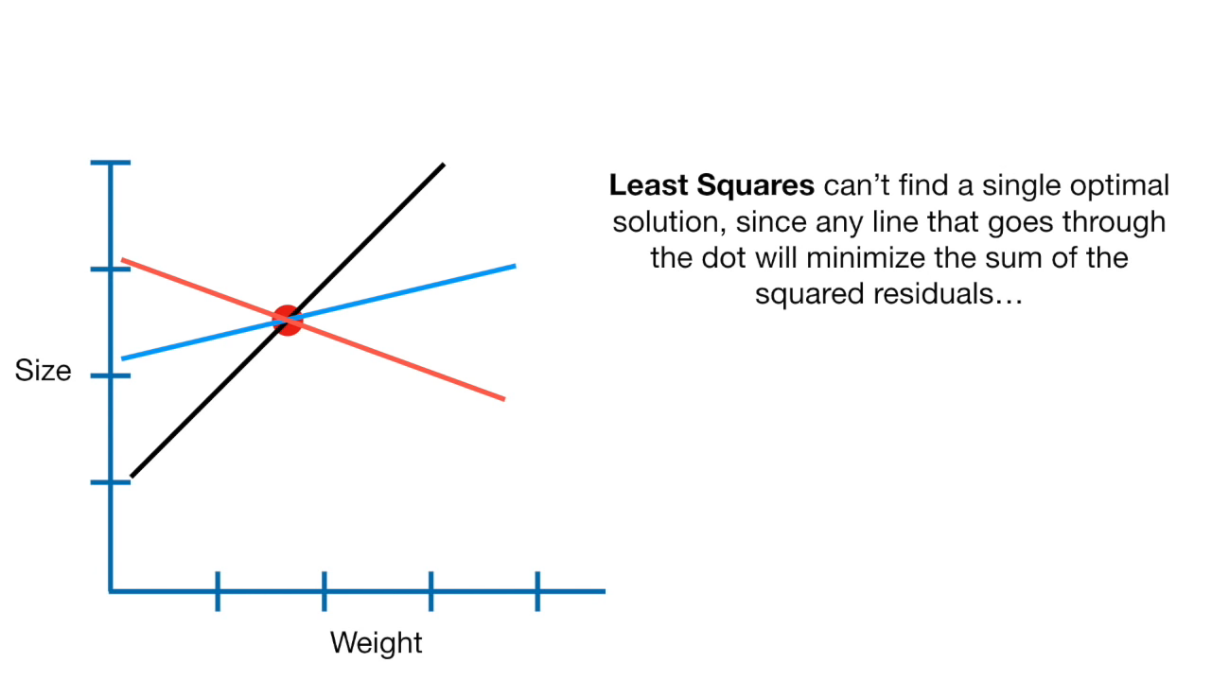
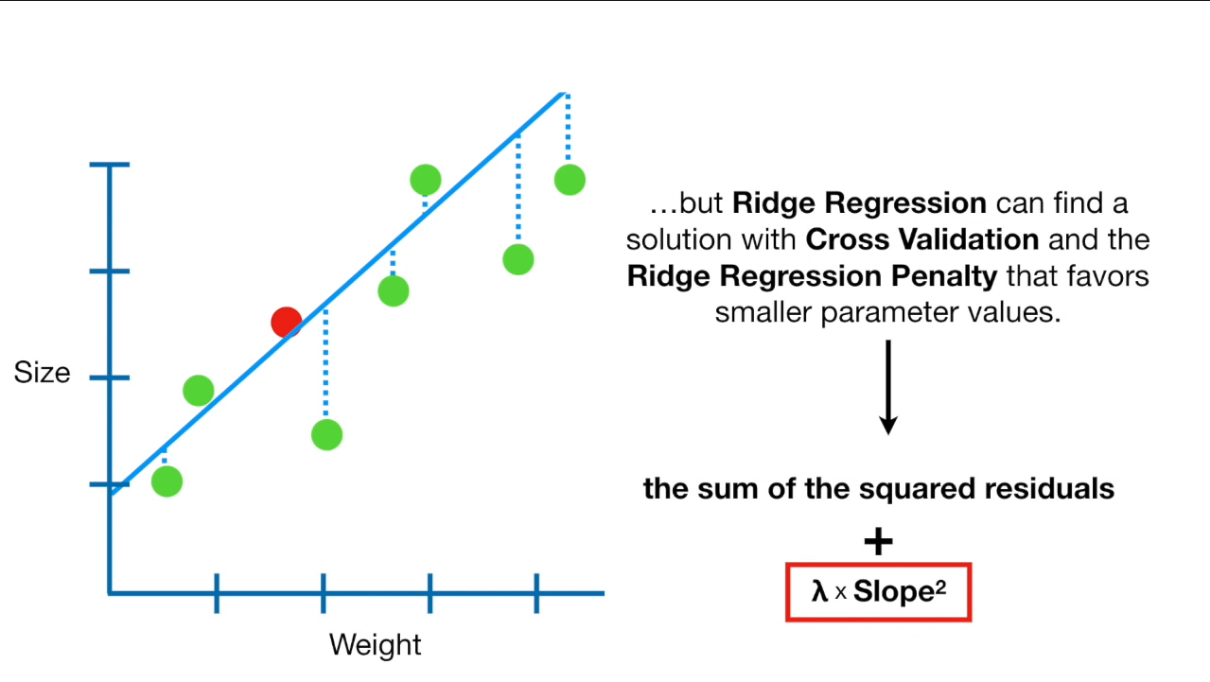 <br>
* In summary <br>
> 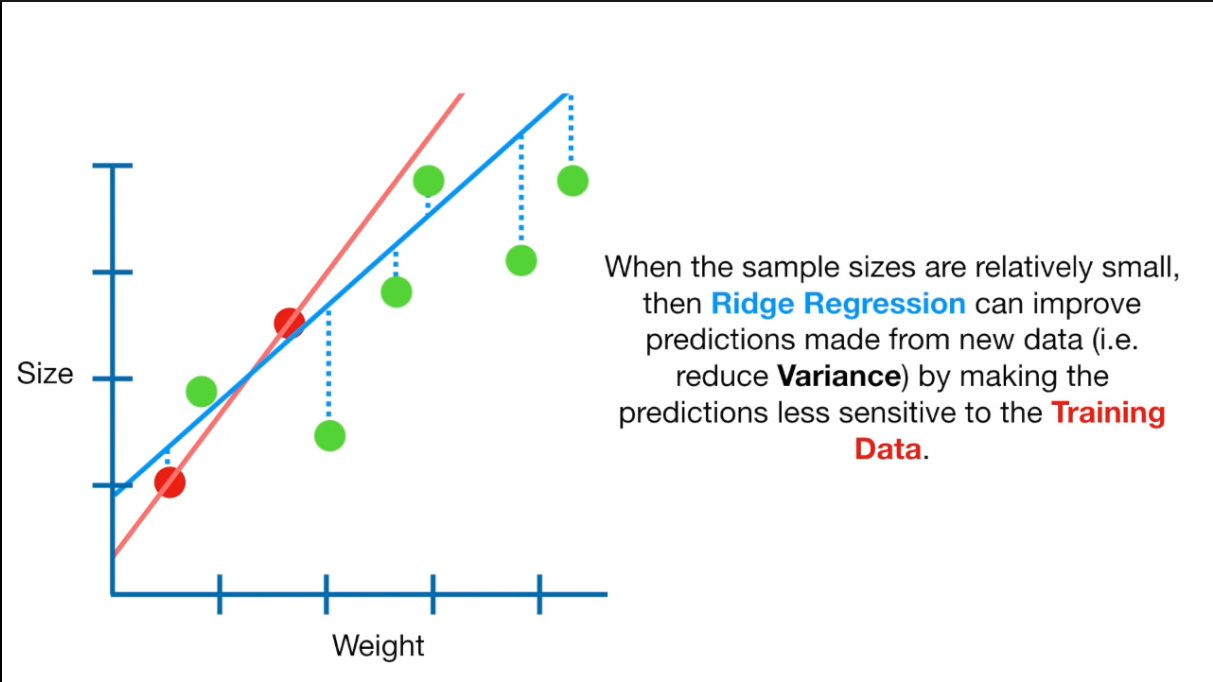
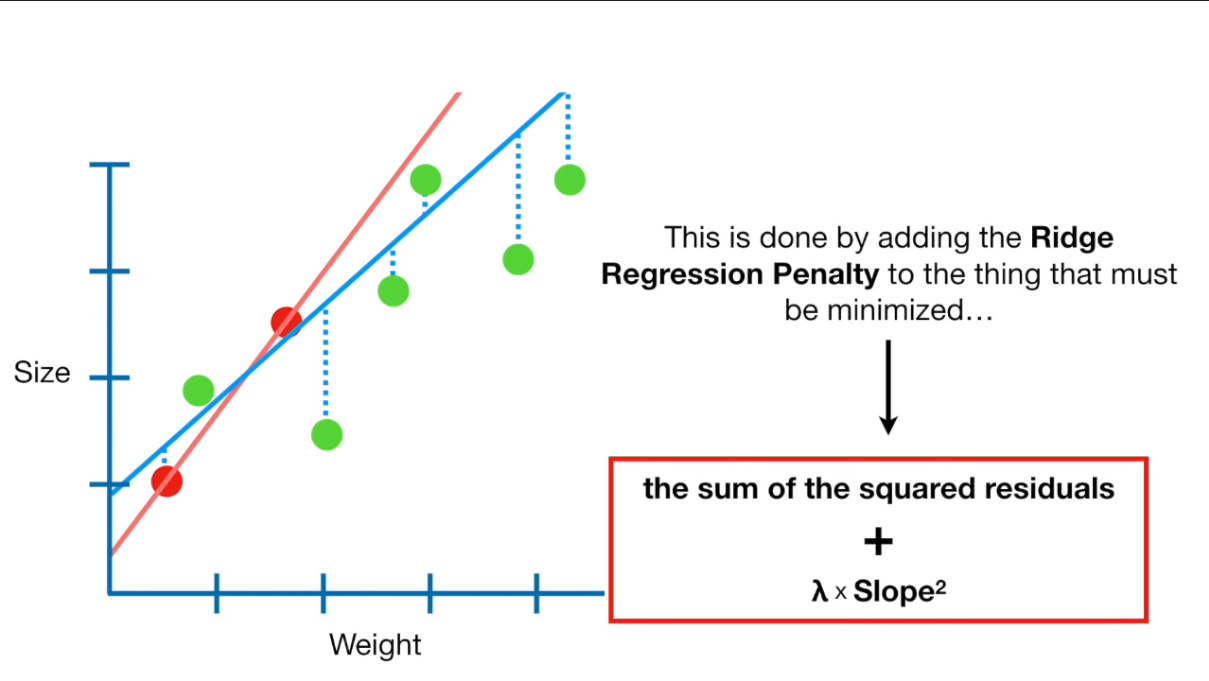

### L2 Regularization
L2 regularization adds an L2 penalty, which equals the square of the magnitude of coefficients. All coefficients are shrunk by the same factor (so none are eliminated).  L2 will not result in sparse models. When the model is overfitted it penalize the model by increasing its total error, and reduce its coefficients magnitude near to zero but doesn't make it zero. Ridge regression and SVMs use this method.
> Sometime the `alpha (α)` is also denoted with `lambda (λ)`, so don't get confused with them they are same <br>
<img src="https://user.oc-static.com/upload/2019/10/07/1570453763024_ridge.png" width="500">

Here, A tuning parameter, λ controls the strength of the L1 penalty. λ is basically the amount of shrinkage:
* The value of λ can be any positive number from 0. 
* When λ = 0, The penalty is 0 and total error is equal to the one found with linear regression.
* As λ increases, more and more coefficients are set to near zero
* As λ increases, bias increases.
* As λ decreases, variance increases.
* Higher the value of λ, higher the penalty will be added to error function.
* λ is not a learnable parameter and is decided by user manually 

<!-- ### Coefficient value before and after using ridge regression
> 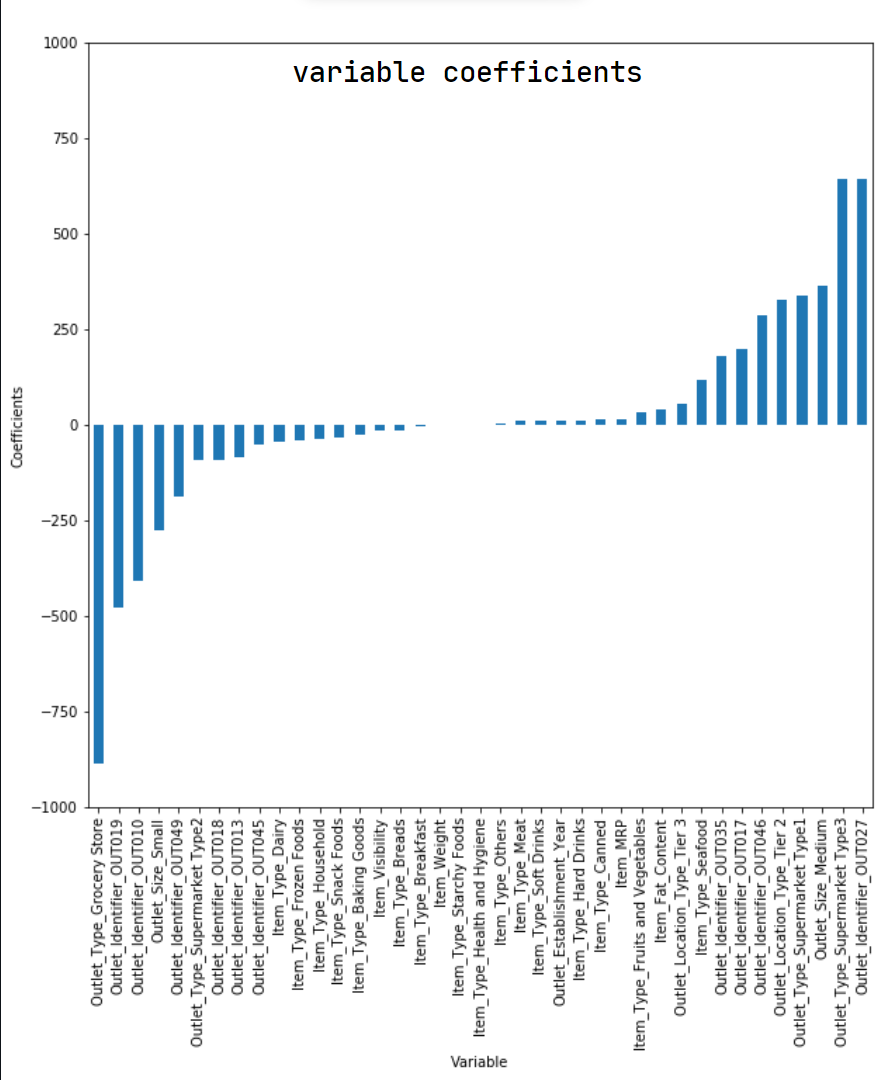
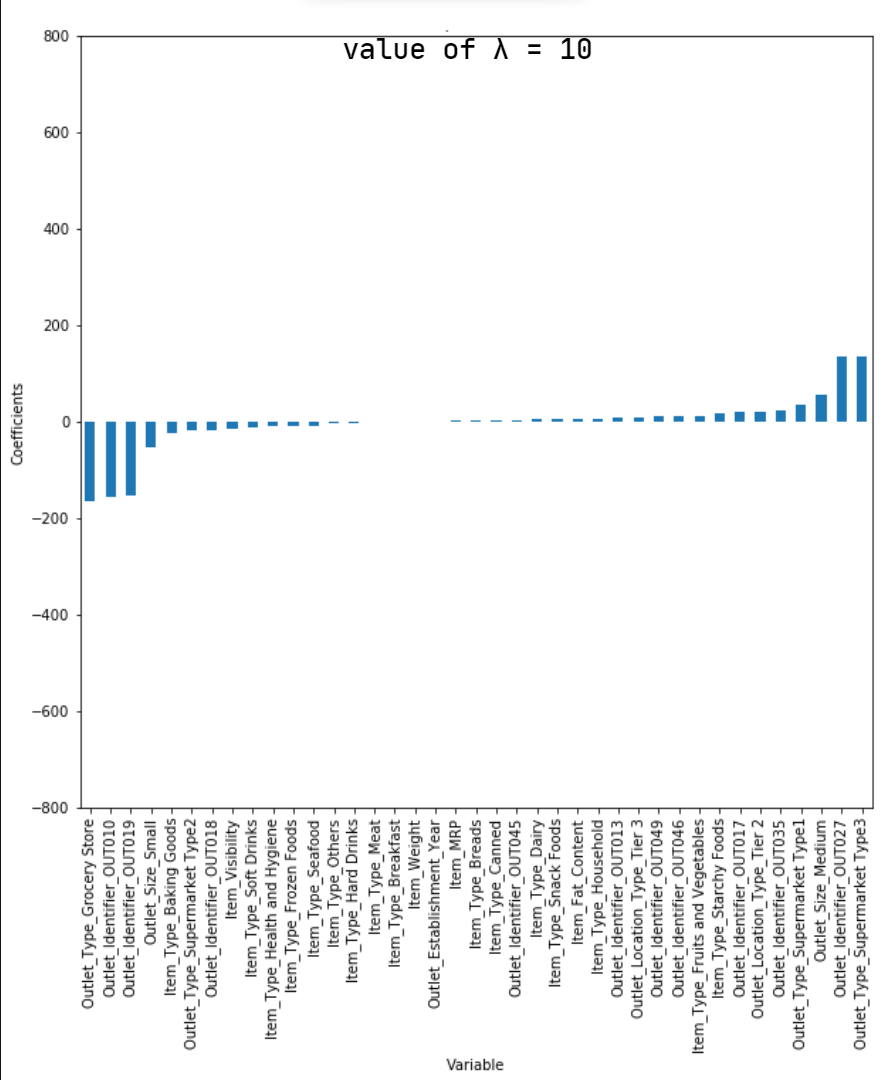 -->
<!-- 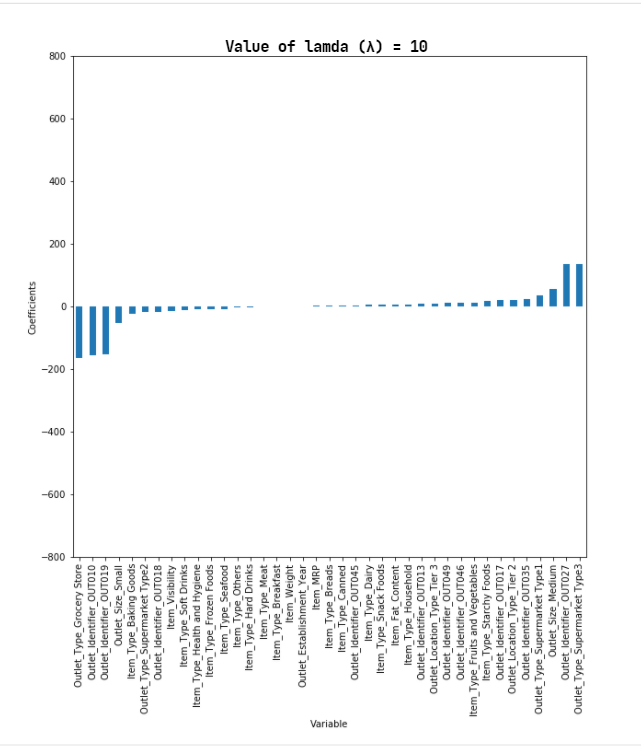 -->

### Important Points
* The value of penalty is also directly proportional to value of coefficients of each feature variable, as the ridge regression also helps in shrinking the value of coefficients for reducing the complexity of a model.
* Ridge regression is useful for dealing with multicollinearity
* Ridge regression is also useful when you think all features of a dataset it useful
* It reduces the complexity and the computation power consumption of a model.
* Ridge regression increases little bias to decrease higher variance of the model aka bias variance trade-off.
* The best fit line choosen by ridge regression is less stepper than of simple regression model, higher steepness of best fit line means a little change in features value can account for higher change in dependent variable. 
> 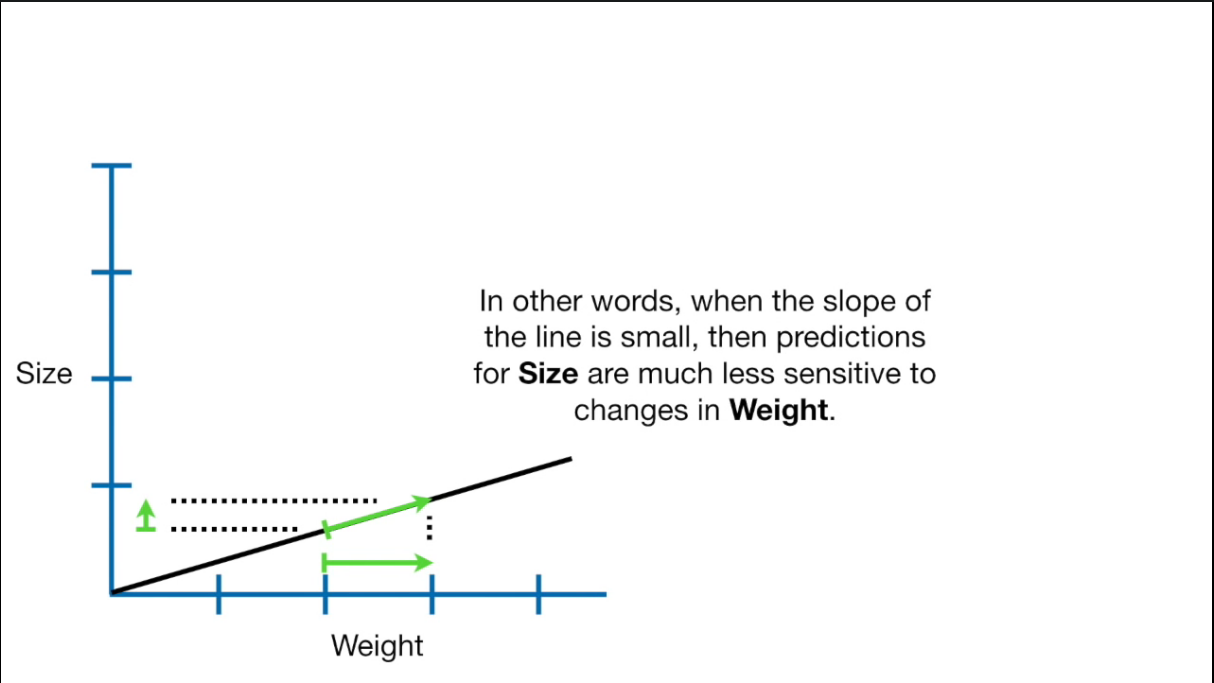
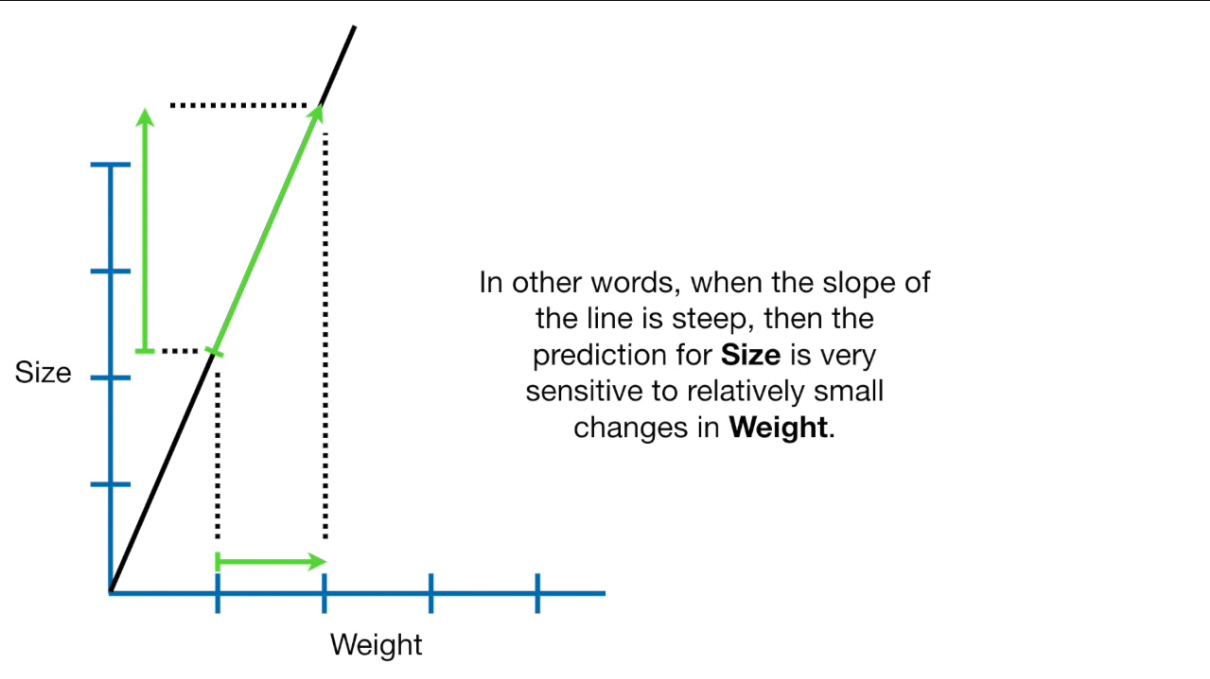

### Terminologies
* `Multi-collinearity` is a term referred to a situation, when two or more feature of a dataset is highly correlated with each other.
* In machine learning, `Model complexity` often refers to the number of features or terms included in a given predictive model, as well as whether the chosen model is linear, nonlinear, and so on. It can also refer to the algorithmic learning complexity or computational complexity. When you increase complexity of your model, it is more likely to overfit, meaning it will adapt to training data very well, but will not figure out general relationships in the data. In such case, performance on a test set is going to be poor.
> Underfitting vs Good fitting vs Overfitting <br>
<img src="https://user.oc-static.com/upload/2019/09/12/15682951882177_biva-11.png" width="600">
* `Sparse model` is a model with many zeroed parmater(features) and has a sparse parameter resulted from the operation of L1 or L2 regularization.

## Building Ridge Regression model

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target
# df = pd.read_csv('house_prices.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
feature = df.iloc[:, :-1]
label = df.iloc[:, -1]
print(feature.shape, label.shape)

(506, 13) (506,)


In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
features = MinMaxScaler().fit_transform(feature)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=31)
print('x_train',x_train.shape, 'x_test',x_test.shape, 'y_train',y_train.shape, 'y_test', y_test.shape)

x_train (404, 13) x_test (102, 13) y_train (404,) y_test (102,)


## Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lmodel = LinearRegression().fit(x_train, y_train)
y_pred = lmodel.predict(x_test)

# Accuracy of the model
print(metrics.r2_score(y_test, y_pred))

0.7849023595572463


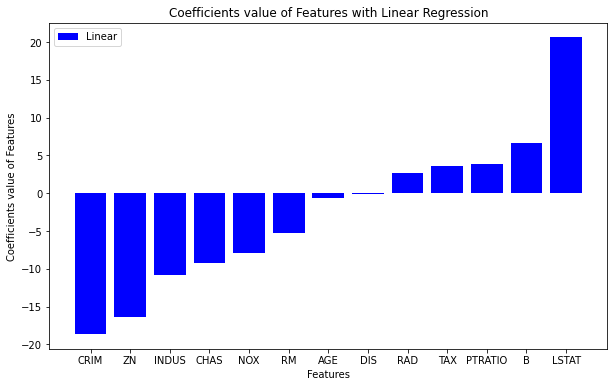

In [8]:
plt.figure(figsize=(10,6))
plt.bar(feature.columns, sorted(lmodel.coef_), color='blue', label='Linear')

# naming axes and title
plt.xlabel('Features')
plt.ylabel('Coefficients value of Features')
plt.title('Coefficients value of Features with Linear Regression')
plt.legend()
plt.show()

### Linear regression with cross validation
To find the best value of Linear Regression, we need to utilize the whole dataset and find the best sample with higher accuracy for that we can use cross validation

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(), x_train, y_train, cv=5, scoring='r2')

array([0.71639243, 0.79167269, 0.58526639, 0.68535757, 0.66499607])

So, these are the best score we are able to get from linear Regression

## Ridge Regression

In [10]:
from sklearn.linear_model import Ridge

In [11]:
rmodel = Ridge(alpha=10).fit(x_train, y_train)
y_pred = rmodel.predict(x_test)

# Accuracy of the model
print(metrics.r2_score(y_test, y_pred))

0.7128628060926008


Ridge regression is not performing that good here cuz our model doesn't have too much columns, so complexity of our linear model is not that high, which it can reduce to improve it performance. If we had the dataset with two many columns, it may have performed well

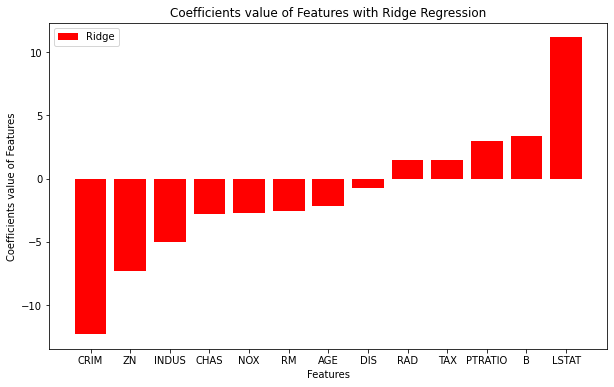

In [12]:
plt.figure(figsize=(10,6))
plt.bar(feature.columns, sorted(rmodel.coef_), color='red', label='Ridge')

# naming axes and title
plt.xlabel('Features')
plt.ylabel('Coefficients value of Features')
plt.title('Coefficients value of Features with Ridge Regression')
plt.legend()
plt.show()

### Ridge Regression with cross validation
To find the best value of alpha or λ we can use `RidgeCV` function, which uses cross validation to find the best value of λ.

In [13]:
from sklearn.linear_model import RidgeCV
# from sklearn.model_selection import KFold
# kfold = KFold(n_splits=5, shuffle=True, random_state=17)
modelr = RidgeCV()
modelr.fit(x_train, y_train)
y_pred = modelr.predict(x_test)
print('Score', metrics.r2_score(y_test, y_pred))
print('Values of Alpha(aka λ)', modelr.alpha_)

Score 0.7851573556879566
Values of Alpha(aka λ) 0.1


RidgeCV is giving us better accuracy than normal Ridge because it is by default using `Leave One-Out cross validation` method. This method of cross validation is not recommeded for bigger dataset as it could be computationally intensive.

### Comparing the coefficients of both model

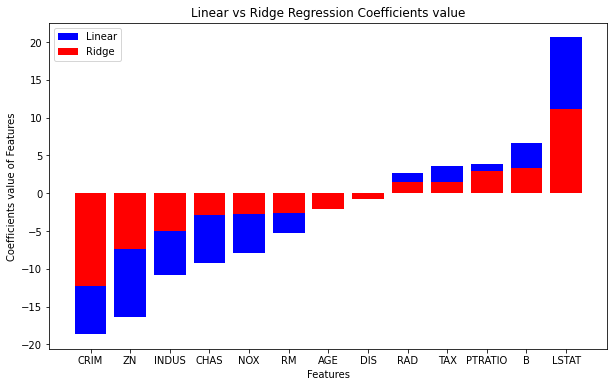

In [14]:
plt.figure(figsize=(10,6))
plt.bar(feature.columns, sorted(lmodel.coef_), color='blue', label='Linear')
plt.bar(feature.columns, sorted(rmodel.coef_), color='red', label='Ridge')

# naming axes and title
plt.xlabel('Features')
plt.ylabel('Coefficients value of Features')
plt.title('Linear vs Ridge Regression Coefficients value')
plt.legend()
plt.show()

Here we can easily see that the Ridge regression has reduced the coefficients value.

### Comparing Ridge with different λ value

In [15]:
# Ridge Regression with different alpha values
alpha_005 = sorted(Ridge(alpha=0.5).fit(x_train, y_train).coef_)
alpha_5 = sorted(Ridge(alpha=5).fit(x_train, y_train).coef_)
alpha_10 = sorted(Ridge(alpha=10).fit(x_train, y_train).coef_)
alpha_50 = sorted(Ridge(alpha=50).fit(x_train, y_train).coef_)

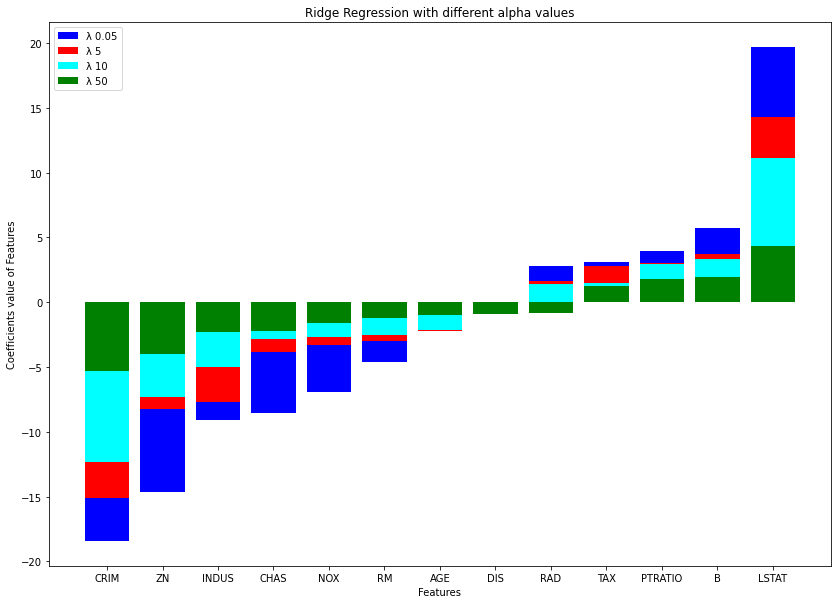

In [16]:
plt.figure(figsize=(14,10))
plt.bar(feature.columns, alpha_005, color='blue', label='λ 0.05')
plt.bar(feature.columns, alpha_5, color='red', label='λ 5')
plt.bar(feature.columns, alpha_10, color='cyan', label='λ 10')
plt.bar(feature.columns, alpha_50, color='green', label='λ 50')

# naming axes and title
plt.xlabel('Features')
plt.ylabel('Coefficients value of Features')
plt.title('Ridge Regression with different alpha values')
plt.legend()
plt.show()

In the above graph you can clearly see that Ridge Regression with `λ` 50 has least coefficients values
